# ***Install these Libraries before running the code***
**1. Pytorch**

pip install torch torchvision torchaudio        # PyTorch + torchvision (main dependency)

**2. Image handling**

pip install Pillow                              # PIL/Pillow

**3. Plotting and visualization**

pip install matplotlib

**4. Numerical operations and metrics**

pip install numpy

pip install scikit-learn                        # for confusion_matrix, classification_report, etc.

pip install seaborn

**1. Import Library**

In [1]:
import os
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay

In [19]:
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [21]:
data_dir = 'Dataset'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transform[x]) 
                  for x in ['train', 'val']
                  }
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x],
        batch_size=4,
        shuffle=True,
        num_workers=4
    )
    for x in ['train', 'val']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print("Dataset sizes:", dataset_sizes)
print("Classes:", class_names)


Dataset sizes: {'train': 400, 'val': 187}
Classes: ['Normal', 'Pothole']


In [22]:
model = models.vgg16(pretrained=True)
for param in model.features.parameters():
    param.requires_grad = False
for param in model.classifier[:-1].parameters():
    param.requires_grad = False
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 2)  

c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier[6].parameters(), lr=0.001, momentum=0.9)
device = torch.device("cpu")
model = model.to(device)
print(device)

cpu


In [6]:
num_epochs = 10

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


Epoch 1/10
----------
train Loss: 0.3398 Acc: 0.8550
val Loss: 0.0771 Acc: 0.9786
Epoch 2/10
----------
train Loss: 0.2934 Acc: 0.8700
val Loss: 0.0803 Acc: 0.9679
Epoch 3/10
----------
train Loss: 0.2672 Acc: 0.9050
val Loss: 0.1018 Acc: 0.9572
Epoch 4/10
----------
train Loss: 0.1989 Acc: 0.9325
val Loss: 0.0968 Acc: 0.9572
Epoch 5/10
----------
train Loss: 0.4044 Acc: 0.8850
val Loss: 0.0945 Acc: 0.9572
Epoch 6/10
----------
train Loss: 0.2152 Acc: 0.9225
val Loss: 0.0984 Acc: 0.9679
Epoch 7/10
----------
train Loss: 0.3191 Acc: 0.8950
val Loss: 0.1823 Acc: 0.9198
Epoch 8/10
----------
train Loss: 0.3373 Acc: 0.9000
val Loss: 0.1087 Acc: 0.9358
Epoch 9/10
----------
train Loss: 0.2753 Acc: 0.9075
val Loss: 0.0928 Acc: 0.9626
Epoch 10/10
----------
train Loss: 0.2868 Acc: 0.9000
val Loss: 0.2203 Acc: 0.9251


In [7]:
torch.save(model.state_dict(), 'vgg16_finetuned.pth')

**2. DATA DIRECTORY**

In [2]:
data_dir = r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset"  # <-----------------------------Update if needed

**3. TRANSFORMS**

In [4]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

**4. LOAD TEST DATASET**

In [5]:
test_dataset = datasets.ImageFolder(root=os.path.join(data_dir, 'test'), transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4, pin_memory=True)

class_names = test_dataset.classes
print(f"Classes found: {class_names}")
print(f"Total test images: {len(test_dataset)}")

Classes found: ['normal', 'pothole']
Total test images: 136


**5. DEVICE SETUP**

In [6]:
device = torch.device("cpu")
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#print(f"Using device: {device}")

**6. LOAD YOUR FINETUNED VGG16 MODEL**

In [7]:
model = models.vgg16(pretrained=False)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 2)  
model.load_state_dict(torch.load('vgg16_finetuned.pth', map_location=device))
model = model.to(device)
model.eval()

c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**7. EVALUATE ON TEST SET**

In [8]:
all_preds = []
all_labels = []
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct / total
print(f"\nTEST ACCURACY: {accuracy*100:.2f}% ({correct}/{total})")

c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



TEST ACCURACY: 88.97% (121/136)


**8. CLASSIFICATION REPORT**

In [9]:
print("\n" + "="*50)
print(" " * 15 + "VGG-16 CLASSIFICATION REPORT")
print("="*50)
print(classification_report(all_labels, all_preds, target_names=class_names))


               VGG-16 CLASSIFICATION REPORT
              precision    recall  f1-score   support

      normal       0.83      1.00      0.90        71
     pothole       1.00      0.77      0.87        65

    accuracy                           0.89       136
   macro avg       0.91      0.88      0.89       136
weighted avg       0.91      0.89      0.89       136



**9. CONFUSION MATRIX**

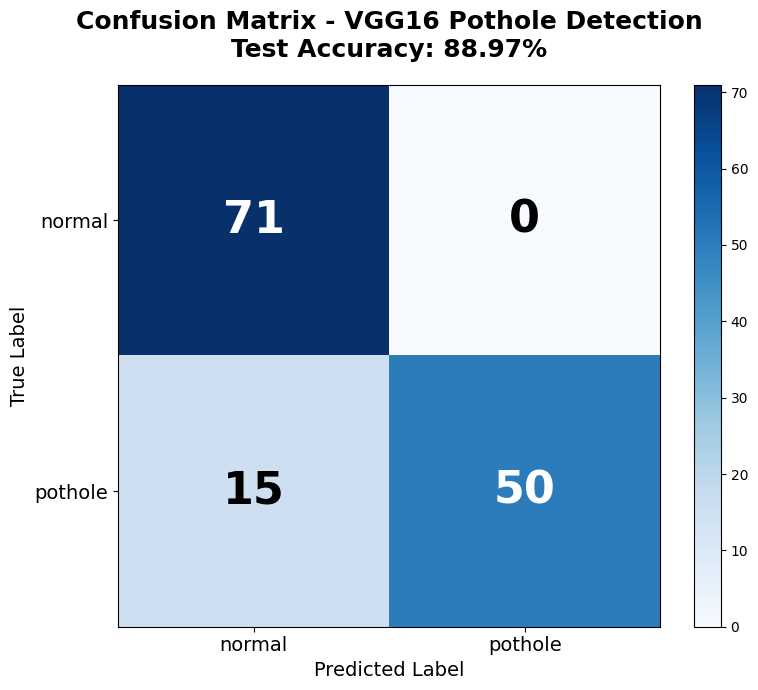

In [10]:
cm = confusion_matrix(all_labels, all_preds)

fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title(f'Confusion Matrix - VGG16 Pothole Detection\nTest Accuracy: {accuracy*100:.2f}%',
             fontsize=18, fontweight='bold', pad=20)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black",
                fontsize=32, fontweight='bold')

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(class_names, fontsize=14)
ax.set_yticklabels(class_names, fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=14)

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

**10. PRECISION / RECALL / F1 BAR CHART**

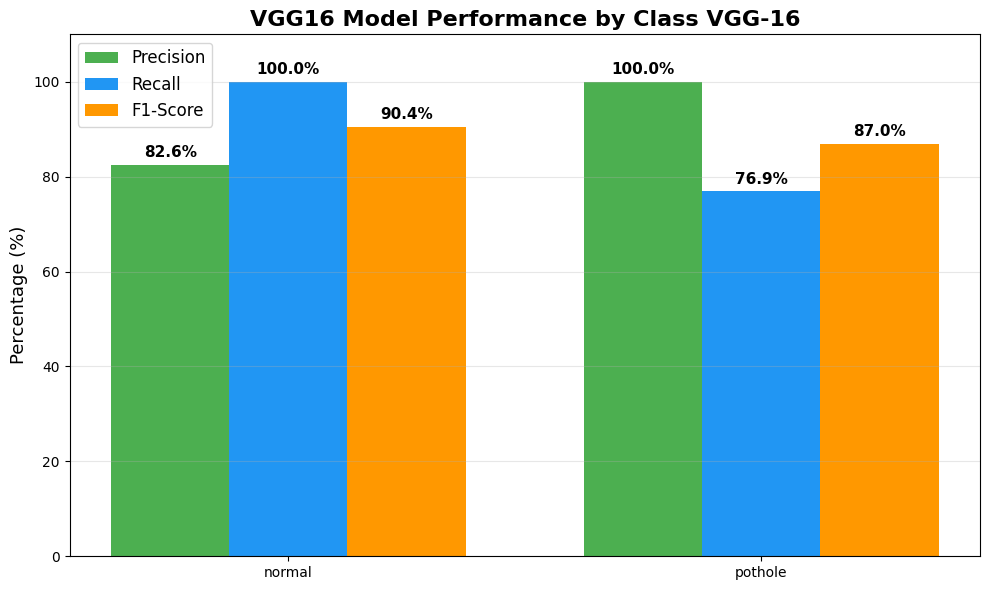

In [11]:
p, r, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None)
metrics = {'Precision': p, 'Recall': r, 'F1-Score': f1}
x = np.arange(len(class_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
for i, (metric_name, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i*width, values*100, width, label=metric_name,
                  color=['#4CAF50', '#2196F3', '#FF9800'][i])
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylim(0, 110)
ax.set_ylabel('Percentage (%)', fontsize=13)
ax.set_title('VGG16 Model Performance by Class VGG-16', fontsize=16, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(class_names)
ax.legend(fontsize=12)
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**11. SINGLE IMAGE PREDICTION WITH OVERLAY**

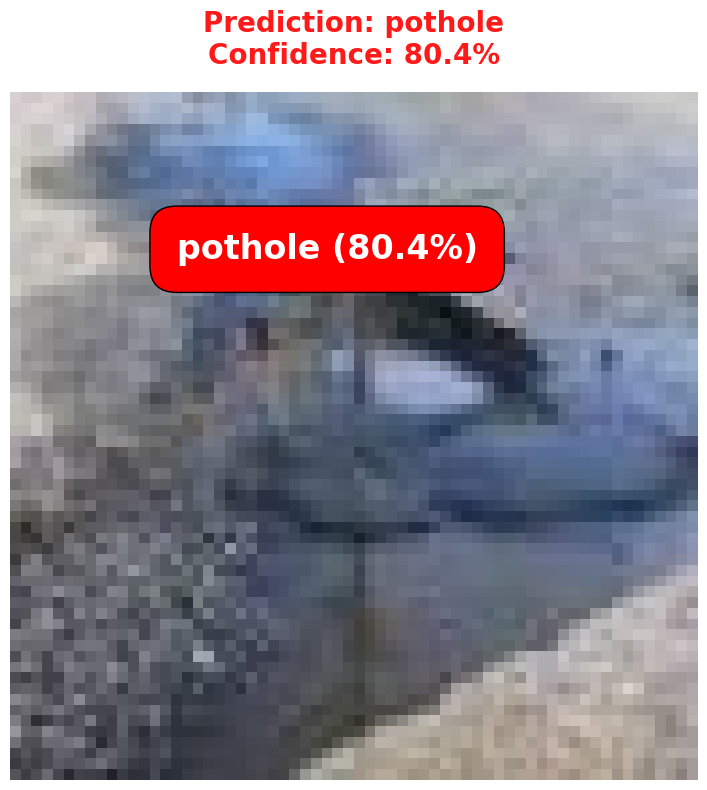

Final Prediction: pothole | Confidence: 80.40%


In [14]:
#image_path = 'normal344.jpg'  # <------------------------------------------------Change to any image you want to showcase
image_path = 'pothole1.jpg'   
image = Image.open(image_path).convert("RGB")

input_tensor = test_transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(input_tensor)
    probs = torch.softmax(output, dim=1)
    confidence = probs.max().item() * 100
    predicted_class = output.argmax(1).item()
    predicted_name = class_names[predicted_class]
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.title(f"Prediction: {predicted_name}\nConfidence: {confidence:.1f}%", 
          fontsize=20, fontweight='bold', color='green' if 'Normal' in predicted_name else 'red',
          pad=20, backgroundcolor='white', alpha=0.9)
plt.text(15, 15, f"{predicted_name} ({confidence:.1f}%)", 
         fontsize=24, fontweight='bold', color='white',
         bbox=dict(boxstyle="round,pad=0.8", facecolor='green' if predicted_class == 0 else 'red'))
plt.tight_layout()
plt.show()

print(f"Final Prediction: {predicted_name} | Confidence: {confidence:.2f}%")